In [113]:
from comet_ml import API
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score


def download_model(username, project_name, experiment_key, ver, model_name):
    api = API()
    api.get(username+"/"+project_name+"/"+experiment_key)
    api.download_registry_model(username,model_name,version=ver, output_path="./models")
# api = API()
# api.get("rachel98/ift-6758-team-8/RblaIu1V6OroSBt0nCcCJQkqJ")
# api.download_registry_model("rachel98", "xgb1", version='1.0.0', output_path="./models")
def test_set_data(path):
    data = pd.read_csv(path)
    return data


In [168]:
df_regular_f1 = test_set_data("D:/NHLPro/data/test_data_regular.csv")
df_playoff_f1 = test_set_data("D:/NHLPro/data/test_data_playoff.csv")
# # Regular and playoff test set data from feature engineering 2
df_regular_f2 = test_set_data("D:/NHLPro/data/M2_added_features_all_test_regular.csv")
df_playoff_f2 = test_set_data("D:/NHLPro/data/M2_added_features_all_test_playoff.csv")


In [154]:
df_regular_f1 = test_set_data("D:/NHLPro/data/test_data_regular.csv")
df_playoff_f1 = test_set_data("D:/NHLPro/data/test_data_playoff.csv")
# # Regular and playoff test set data from feature engineering 2
df_regular_f2 = test_set_data("D:/NHLPro/data/M2_added_features_all_test_regular.csv")
df_playoff_f2 = test_set_data("D:/NHLPro/data/M2_added_features_all_test_playoff.csv")

# Download Logistic Regression distance model
#download_model("rachel98", "ift-6758-team-8", "Myl1VE9U98j5vd81EXlzLZTLp", "logisticregression1")

# Load Logistic Regression distance model
lr_1_model = joblib.load("models/lr_dist.joblib")

# Divide data into X and y
X_regular_f1 = df_regular_f1[['shot_distance']]
y_regular_f1 = df_regular_f1['goal']
X_playoff_f1 = df_playoff_f1[['shot_distance']]
y_playoff_f1 = df_playoff_f1['goal']

# Predict on regular and playoff test set data from feature engineering 1
lr_1_regular_f1 = lr_1_model.predict(X_regular_f1)
lr_1_playoff_f1 = lr_1_model.predict(X_playoff_f1)

# Predict accuracy on regular and playoff test set data from feature engineering 1
# Accuracy 
lr_1_regular_f1_accuracy = accuracy_score(y_regular_f1, lr_1_regular_f1)
print("Logistic Regression distance model accuracy on regular test set data from feature engineering 1: ", lr_1_regular_f1_accuracy)    
# Playoff
lr_1_playoff_f1_accuracy = accuracy_score(y_playoff_f1, lr_1_playoff_f1)
print("Logistic Regression distance model accuracy on playoff test set data from feature engineering 1: ", lr_1_playoff_f1_accuracy)


Logistic Regression distance model accuracy on regular test set data from feature engineering 1:  0.9030358089181618
Logistic Regression distance model accuracy on playoff test set data from feature engineering 1:  0.9103477167993297


C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Logistic Regression distance model: ROC AUC=0.703


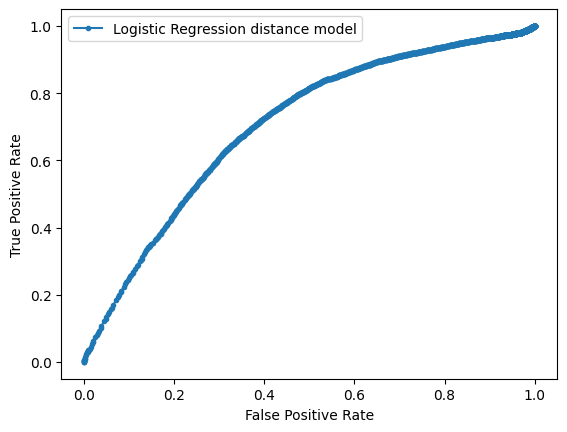

In [155]:
# ROC curve for regular data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores
lr_1_regular_f1_probs = lr_1_model.predict_proba(X_regular_f1)
# keep probabilities for the positive outcome only
lr_1_regular_f1_probs = lr_1_regular_f1_probs[:, 1]
# calculate roc curves
lr_1_regular_f1_fpr, lr_1_regular_f1_tpr, _ = roc_curve(y_regular_f1, lr_1_regular_f1_probs)
# calculate AUC
lr_1_regular_f1_auc = roc_auc_score(y_regular_f1, lr_1_regular_f1_probs)
print('Logistic Regression distance model: ROC AUC=%.3f' % (lr_1_regular_f1_auc))
# plot the roc curve for the model
pyplot.plot(lr_1_regular_f1_fpr, lr_1_regular_f1_tpr, marker='.', label='Logistic Regression distance model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



Logistic Regression angle model accuracy on regular test set data from feature engineering 1:  0.9030358089181618
Logistic Regression angle model accuracy on playoff test set data from feature engineering 1:  0.9103477167993297
Logistic Regression angle model: ROC AUC=0.507


C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


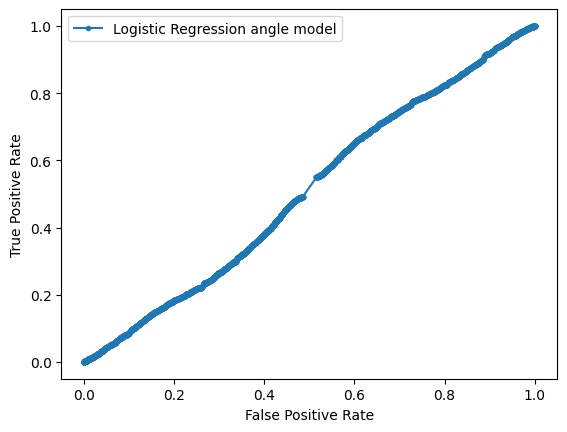

In [156]:
#Download Logistic Regression Model 2
#download_model("rachel98", "ift-6758-team-8", "bbwnCiJMq3DXiBgh46vgoAxzY", "logisticregression2")

# Load Logistic Regression Model 2
lr_2_model = joblib.load("models/lr_angle.joblib")

# Divide data into X and y
X_regular_f1 = df_regular_f1[['shot_angle']]
y_regular_f1 = df_regular_f1['goal']

X_playoff_f1 = df_playoff_f1[['shot_angle']]
y_playoff_f1 = df_playoff_f1['goal']

# Predict on regular and playoff test set data from feature engineering 1
lr_2_regular_f1 = lr_2_model.predict(X_regular_f1)
lr_2_playoff_f1 = lr_2_model.predict(X_playoff_f1)

# Predict accuracy on regular and playoff test set data from feature engineering 1
# Accuracy
lr_2_regular_f1_accuracy = accuracy_score(y_regular_f1, lr_2_regular_f1)
print("Logistic Regression angle model accuracy on regular test set data from feature engineering 1: ", lr_2_regular_f1_accuracy)
# Playoff
lr_2_playoff_f1_accuracy = accuracy_score(y_playoff_f1, lr_2_playoff_f1)
print("Logistic Regression angle model accuracy on playoff test set data from feature engineering 1: ", lr_2_playoff_f1_accuracy)

# ROC curve for regular data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores
lr_2_regular_f1_probs = lr_2_model.predict_proba(X_regular_f1)
# keep probabilities for the positive outcome only
lr_2_regular_f1_probs = lr_2_regular_f1_probs[:, 1]
# calculate roc curves
lr_2_regular_f1_fpr, lr_2_regular_f1_tpr, _ = roc_curve(y_regular_f1, lr_2_regular_f1_probs)
# calculate AUC
lr_2_regular_f1_auc = roc_auc_score(y_regular_f1, lr_2_regular_f1_probs)
print('Logistic Regression angle model: ROC AUC=%.3f' % (lr_2_regular_f1_auc))
# plot the roc curve for the model
pyplot.plot(lr_2_regular_f1_fpr, lr_2_regular_f1_tpr, marker='.', label='Logistic Regression angle model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



Logistic Regression distance and angle model accuracy on regular test set data from feature engineering 1:  0.9030358089181618
Logistic Regression distance and angle model accuracy on playoff test set data from feature engineering 1:  0.9103477167993297
Logistic Regression distance and angle model: ROC AUC=0.704


C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


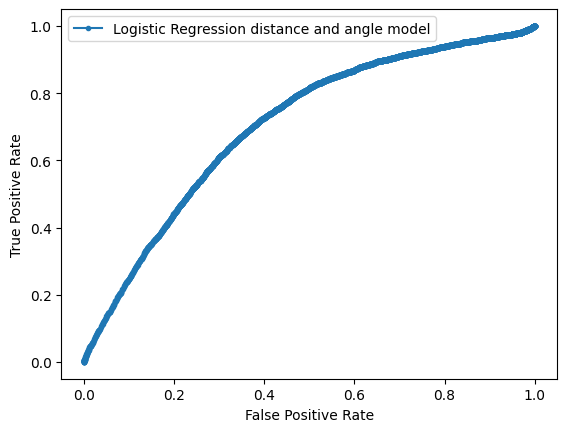

In [157]:
# Download Logistic Regression Model 3
#download_model("rachel98", "ift-6758-team-8", "ozUH1BdUWvhvRymXLAQUEPlcA", "logisticregression3")

# Load Logistic Regression Model 3
lr_3_model = joblib.load("models/lr_dist_angle.joblib")

# Divide data into X and y
X_regular_f1 = df_regular_f1[['shot_distance', 'shot_angle']]
y_regular_f1 = df_regular_f1['goal']

X_playoff_f1 = df_playoff_f1[['shot_distance', 'shot_angle']]
y_playoff_f1 = df_playoff_f1['goal']

# Predict on regular and playoff test set data from feature engineering 1
lr_3_regular_f1 = lr_3_model.predict(X_regular_f1)
lr_3_playoff_f1 = lr_3_model.predict(X_playoff_f1)

# Predict accuracy on regular and playoff test set data from feature engineering 1
# Accuracy
lr_3_regular_f1_accuracy = accuracy_score(y_regular_f1, lr_3_regular_f1)
print("Logistic Regression distance and angle model accuracy on regular test set data from feature engineering 1: ", lr_3_regular_f1_accuracy)
# Playoff
lr_3_playoff_f1_accuracy = accuracy_score(y_playoff_f1, lr_3_playoff_f1)
print("Logistic Regression distance and angle model accuracy on playoff test set data from feature engineering 1: ", lr_3_playoff_f1_accuracy)

# ROC curve for regular data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate scores
lr_3_regular_f1_probs = lr_3_model.predict_proba(X_regular_f1)
# keep probabilities for the positive outcome only
lr_3_regular_f1_probs = lr_3_regular_f1_probs[:, 1]
# calculate roc curves
lr_3_regular_f1_fpr, lr_3_regular_f1_tpr, _ = roc_curve(y_regular_f1, lr_3_regular_f1_probs)
# calculate AUC
lr_3_regular_f1_auc = roc_auc_score(y_regular_f1, lr_3_regular_f1_probs)
print('Logistic Regression distance and angle model: ROC AUC=%.3f' % (lr_3_regular_f1_auc))
# plot the roc curve for the model
pyplot.plot(lr_3_regular_f1_fpr, lr_3_regular_f1_tpr, marker='.', label='Logistic Regression distance and angle model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [158]:
# Download XGBoost Final Model
download_model("rachel98", "ift-6758-team-8", "7zlkzDKnjV8TprEt88CqmfdEo", "xgb3")

TypeError: download_model() missing 1 required positional argument: 'model_name'

In [93]:
df_regular_f2['rebound']

0        0
1        0
2        0
3        0
4        0
        ..
50714    0
50715    0
50716    0
50717    0
50718    0
Name: rebound, Length: 50719, dtype: int32

In [174]:
def preprocess_data(df):
    df=df[['shot_angle','speed','shot_distance','distance_from_last_event','period_time','coordinates_y','time_from_last_event(s)','goal']]
    # Conert period time to seconds
    df['period_time'] = df['period_time'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
    return df

In [175]:
df_regular_f2

,shot_angle,speed,shot_distance,distance_from_last_event,period_time,coordinates_y,time_from_last_event(s),goal
0,14.035896,3.400235,4.123106,85.005882,00:25,-1.0,25.0,1
1,2.009550,1.084243,57.035077,29.274562,01:31,-2.0,27.0,0
2,12.994567,9.072553,26.683328,127.015747,03:23,-6.0,14.0,0
3,33.689962,15.500000,36.055513,93.000000,03:56,-20.0,6.0,0
4,31.675405,9.166667,55.226805,55.000000,04:47,-29.0,6.0,0
...,...,...,...,...,...,...,...,...
66040,62.446765,7.095877,25.942244,149.013422,16:45,-23.0,21.0,0
66041,-71.113496,3.636834,40.162171,58.189346,17:20,38.0,16.0,0
66042,-44.999595,14.080128,14.142136,28.160256,17:22,10.0,2.0,0
66043,41.185454,4.644595,10.630146,148.627050,18:50,-7.0,32.0,0


XGBoost model accuracy on regular test set data from feature engineering 2:  0.9030358089181618
XGBoost model accuracy on playoff test set data from feature engineering 2:  0.909509844993716
XGBoost model: ROC AUC=0.745


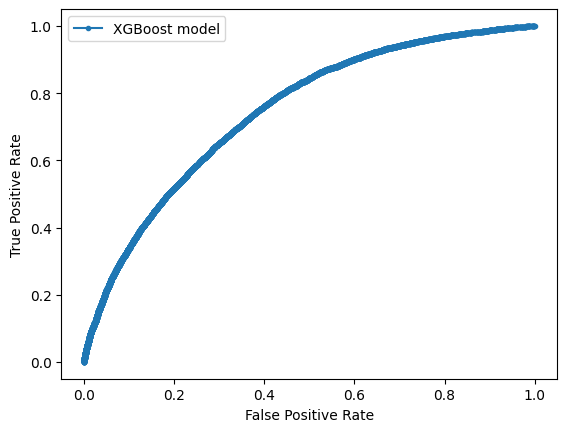

In [176]:
# Load XGBoost Final Model
xgb_model = joblib.load("models/xgb3.joblib")

# Preprocess data
df_regular_f2 = preprocess_data(df_regular_f2)
df_playoff_f2 = preprocess_data(df_playoff_f2)

# Divide data into X and y
X_regular_f2 = df_regular_f2[['shot_angle','speed','shot_distance','distance_from_last_event','period_time','coordinates_y','time_from_last_event(s)']]
y_regular_f2 = df_regular_f2['goal']

X_playoff_f2 = df_playoff_f2[['shot_angle','speed','shot_distance','distance_from_last_event','period_time','coordinates_y','time_from_last_event(s)']]
y_playoff_f2 = df_playoff_f2['goal']

# Predict on regular and playoff test set data from feature engineering 2
xgb_regular_f2 = xgb_model.predict(X_regular_f2)
xgb_playoff_f2 = xgb_model.predict(X_playoff_f2)

# Predict accuracy on regular and playoff test set data from feature engineering 2
# Accuracy
xgb_regular_f2_accuracy = accuracy_score(y_regular_f2, xgb_regular_f2)
print("XGBoost model accuracy on regular test set data from feature engineering 2: ", xgb_regular_f2_accuracy)
# Playoff
xgb_playoff_f2_accuracy = accuracy_score(y_playoff_f2, xgb_playoff_f2)
print("XGBoost model accuracy on playoff test set data from feature engineering 2: ", xgb_playoff_f2_accuracy)

# ROC curve for regular data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
xgb_regular_f2_probs = xgb_model.predict_proba(X_regular_f2)
# keep probabilities for the positive outcome only
xgb_regular_f2_probs = xgb_regular_f2_probs[:, 1]
# calculate roc curves
xgb_regular_f2_fpr, xgb_regular_f2_tpr, _ = roc_curve(y_regular_f2, xgb_regular_f2_probs)
# calculate AUC
xgb_regular_f2_auc = roc_auc_score(y_regular_f2, xgb_regular_f2_probs)
print('XGBoost model: ROC AUC=%.3f' % (xgb_regular_f2_auc))
# plot the roc curve for the model
pyplot.plot(xgb_regular_f2_fpr, xgb_regular_f2_tpr, marker='.', label='XGBoost model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [4]:
download_model("rachel98", "ift-6758-team-8", "7zlkzDKnjV8TprEt88CqmfdEo", "xgb3")
download_model("rachel98", "ift-6758-team-8", "RblaIu1V6OroSBt0nCcCJQkqJ", "xgb1")

COMET INFO: Downloading registry model 'xgb3', version '1.0.0', stage None from workspace 'rachel98'...
COMET INFO: Unzipping model to 'c:\\Users\\pupne\\OneDrive\\Documents\\GitHub\\Team_8_IFT_6758\\src\\models\\models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'xgb1', version '1.0.0', stage None from workspace 'rachel98'...
COMET INFO: Unzipping model to 'c:\\Users\\pupne\\OneDrive\\Documents\\GitHub\\Team_8_IFT_6758\\src\\models\\models' ...
COMET INFO: done!


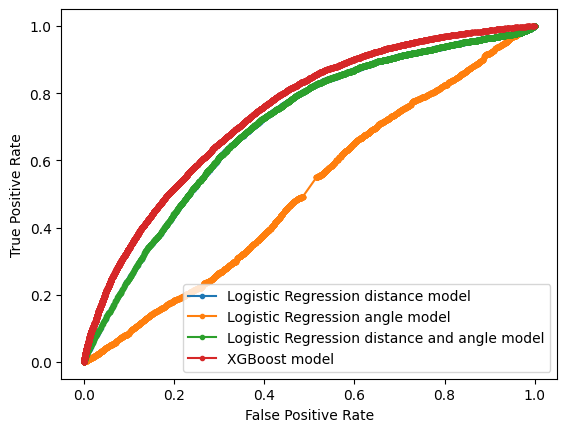

In [177]:
# Function to plot all the roc curves in a single plot of logistic regression(distance, angle , distance and angle) and xgboost models
def plot_roc_curve(lr_1_regular_f1_fpr, lr_1_regular_f1_tpr, lr_2_regular_f1_fpr, lr_2_regular_f1_tpr, lr_3_regular_f1_fpr, lr_3_regular_f1_tpr, xgb_regular_f2_fpr, xgb_regular_f2_tpr):
    pyplot.plot(lr_1_regular_f1_fpr, lr_1_regular_f1_tpr, marker='.', label='Logistic Regression distance model')
    pyplot.plot(lr_2_regular_f1_fpr, lr_2_regular_f1_tpr, marker='.', label='Logistic Regression angle model')
    pyplot.plot(lr_3_regular_f1_fpr, lr_3_regular_f1_tpr, marker='.', label='Logistic Regression distance and angle model')
    pyplot.plot(xgb_regular_f2_fpr, xgb_regular_f2_tpr, marker='.', label='XGBoost model')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

plot_roc_curve(lr_1_regular_f1_fpr, lr_1_regular_f1_tpr, lr_2_regular_f1_fpr, lr_2_regular_f1_tpr, lr_3_regular_f1_fpr, lr_3_regular_f1_tpr, xgb_regular_f2_fpr, xgb_regular_f2_tpr)

In [178]:
import numpy as np

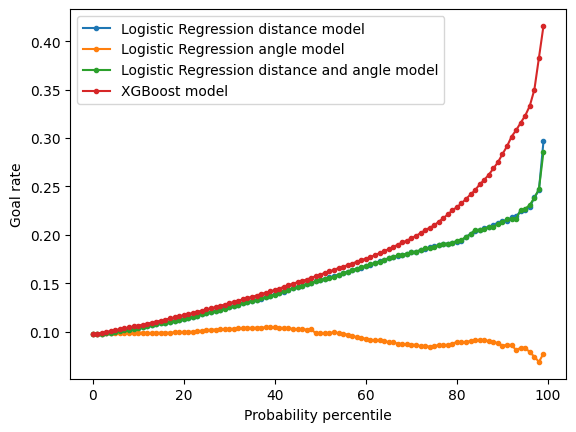

In [208]:
# Plot Goal rate vs probability percentile for logistic regression models(distance, angle , distance and angle) and xgboost models
def plot_goal_rate_vs_probability_percentile(y_regular_f1,y_regular_f2,lr_1_regular_f1_probs, lr_2_regular_f1_probs, lr_3_regular_f1_probs, xgb_regular_f2_probs):
    lr_1_regular_f1_probs_percentile = np.percentile(lr_1_regular_f1_probs, np.arange(0, 100, 1))
    lr_2_regular_f1_probs_percentile = np.percentile(lr_2_regular_f1_probs, np.arange(0, 100, 1))
    lr_3_regular_f1_probs_percentile = np.percentile(lr_3_regular_f1_probs, np.arange(0, 100, 1))
    xgb_regular_f2_probs_percentile = np.percentile(xgb_regular_f2_probs, np.arange(0, 100, 1))

    # Calculate the goal rate for each probability percentile
    lr_1_regular_f1_goal_rate = []
    lr_2_regular_f1_goal_rate = []
    lr_3_regular_f1_goal_rate = []
    xgb_regular_f2_goal_rate = []

    for i in range(0, 100):
        lr_1_regular_f1_goal_rate.append(np.mean(y_regular_f1[lr_1_regular_f1_probs > lr_1_regular_f1_probs_percentile[i]]))
        lr_2_regular_f1_goal_rate.append(np.mean(y_regular_f1[lr_2_regular_f1_probs > lr_2_regular_f1_probs_percentile[i]]))
        lr_3_regular_f1_goal_rate.append(np.mean(y_regular_f1[lr_3_regular_f1_probs > lr_3_regular_f1_probs_percentile[i]]))
        xgb_regular_f2_goal_rate.append(np.mean(y_regular_f2[xgb_regular_f2_probs > xgb_regular_f2_probs_percentile[i]]))

    pyplot.plot(np.arange(0, 100, 1), lr_1_regular_f1_goal_rate, marker='.', label='Logistic Regression distance model')
    pyplot.plot(np.arange(0, 100, 1), lr_2_regular_f1_goal_rate, marker='.', label='Logistic Regression angle model')
    pyplot.plot(np.arange(0, 100, 1), lr_3_regular_f1_goal_rate, marker='.', label='Logistic Regression distance and angle model')
    pyplot.plot(np.arange(0, 100, 1), xgb_regular_f2_goal_rate, marker='.', label='XGBoost model')
    # axis labels
    pyplot.xlabel('Probability percentile')
    pyplot.ylabel('Goal rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

plot_goal_rate_vs_probability_percentile(y_regular_f1,y_regular_f2,lr_1_regular_f1_probs, lr_2_regular_f1_probs, lr_3_regular_f1_probs, xgb_regular_f2_probs)


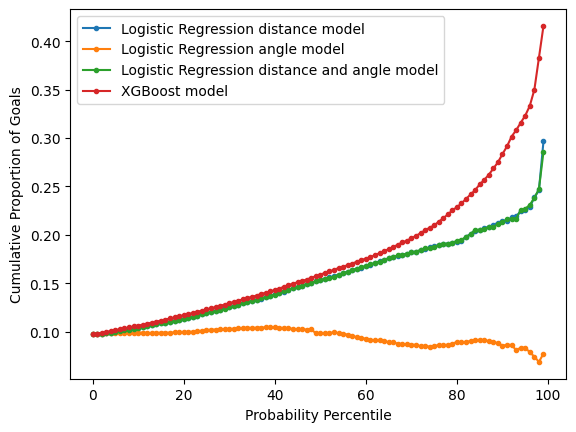

In [209]:
# Plot cumulative proportion of goals vs probability percentile for logistic regression(distance, angle , distance and angle) and xgboost models
def plot_cumulative_proportion_of_goals_vs_probability_percentile(df_regular_f1,df_regular_f2,lr_1_regular_f1_probs, lr_2_regular_f1_probs, lr_3_regular_f1_probs, xgb_regular_f2_probs):
    # calculate cumulative proportion of goals
    lr_1_regular_f1_cumulative_proportion_of_goals = []
    lr_2_regular_f1_cumulative_proportion_of_goals = []
    lr_3_regular_f1_cumulative_proportion_of_goals = []
    xgb_regular_f2_cumulative_proportion_of_goals = []
    for i in range(0, 100):
        lr_1_regular_f1_cumulative_proportion_of_goals.append(np.mean(df_regular_f1['goal'][lr_1_regular_f1_probs > np.percentile(lr_1_regular_f1_probs, i)]))
        lr_2_regular_f1_cumulative_proportion_of_goals.append(np.mean(df_regular_f1['goal'][lr_2_regular_f1_probs > np.percentile(lr_2_regular_f1_probs, i)]))
        lr_3_regular_f1_cumulative_proportion_of_goals.append(np.mean(df_regular_f1['goal'][lr_3_regular_f1_probs > np.percentile(lr_3_regular_f1_probs, i)]))
        xgb_regular_f2_cumulative_proportion_of_goals.append(np.mean(df_regular_f2['goal'][xgb_regular_f2_probs > np.percentile(xgb_regular_f2_probs, i)]))
    # plot cumulative proportion of goals vs probability percentile
    pyplot.plot(np.arange(0, 100), lr_1_regular_f1_cumulative_proportion_of_goals, marker='.', label='Logistic Regression distance model')
    pyplot.plot(np.arange(0, 100), lr_2_regular_f1_cumulative_proportion_of_goals, marker='.', label='Logistic Regression angle model')
    pyplot.plot(np.arange(0, 100), lr_3_regular_f1_cumulative_proportion_of_goals, marker='.', label='Logistic Regression distance and angle model')
    pyplot.plot(np.arange(0, 100), xgb_regular_f2_cumulative_proportion_of_goals, marker='.', label='XGBoost model')
    # axis labels
    pyplot.xlabel('Probability Percentile')
    pyplot.ylabel('Cumulative Proportion of Goals')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

plot_cumulative_proportion_of_goals_vs_probability_percentile(df_regular_f1,df_regular_f2,lr_1_regular_f1_probs, lr_2_regular_f1_probs, lr_3_regular_f1_probs, xgb_regular_f2_probs)

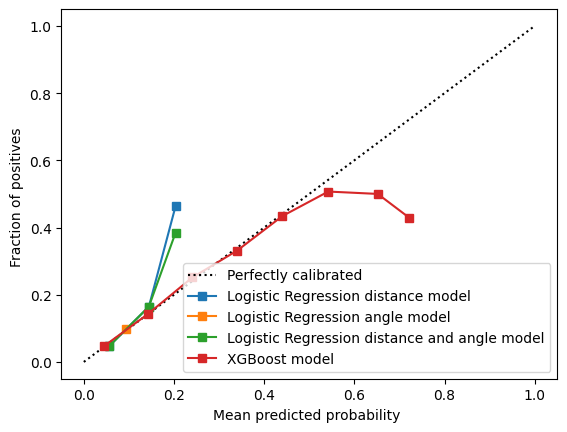

In [210]:
# Plot calibration plot for logistic regression(distance, angle , distance and angle) and xgboost models using CalibrationDisplay with legends
from sklearn.calibration import CalibrationDisplay
from sklearn.calibration import calibration_curve

def plot_calibration_curve(df_regular_f1,df_regular_f2,y_regular_f1,y_regular_f2,lr_1_regular_f1_probs, lr_2_regular_f1_probs, lr_3_regular_f1_probs, xgb_regular_f2_probs):
    # Calculate y_prob for each model for CalibrationDisplay
    lr_1_regular_f1_y_prob = []
    lr_2_regular_f1_y_prob = []
    lr_3_regular_f1_y_prob = []
    xgb_regular_f2_y_prob = []
    for i in range(0, 100):
        lr_1_regular_f1_y_prob.append(np.mean(df_regular_f1['goal'][lr_1_regular_f1_probs > np.percentile(lr_1_regular_f1_probs, i)]))
        lr_2_regular_f1_y_prob.append(np.mean(df_regular_f1['goal'][lr_2_regular_f1_probs > np.percentile(lr_2_regular_f1_probs, i)]))
        lr_3_regular_f1_y_prob.append(np.mean(df_regular_f1['goal'][lr_3_regular_f1_probs > np.percentile(lr_3_regular_f1_probs, i)]))
        xgb_regular_f2_y_prob.append(np.mean(df_regular_f2['goal'][xgb_regular_f2_probs > np.percentile(xgb_regular_f2_probs, i)]))
    lr_1_regular_f1_prob_true, lr_1_regular_f1_prob_pred = calibration_curve(y_regular_f1, lr_1_regular_f1_probs, n_bins=10)
    lr_2_regular_f1_prob_true, lr_2_regular_f1_prob_pred = calibration_curve(y_regular_f1, lr_2_regular_f1_probs, n_bins=10)
    lr_3_regular_f1_prob_true, lr_3_regular_f1_prob_pred = calibration_curve(y_regular_f1, lr_3_regular_f1_probs, n_bins=10)
    xgb_regular_f2_prob_true, xgb_regular_f2_prob_pred = calibration_curve(y_regular_f2, xgb_regular_f2_probs, n_bins=10)
    lr_1_regular_f1_display = CalibrationDisplay(lr_1_regular_f1_prob_true, lr_1_regular_f1_prob_pred, lr_1_regular_f1_y_prob)
    lr_2_regular_f1_display = CalibrationDisplay(lr_2_regular_f1_prob_true, lr_2_regular_f1_prob_pred, lr_2_regular_f1_y_prob)
    lr_3_regular_f1_display = CalibrationDisplay(lr_3_regular_f1_prob_true, lr_3_regular_f1_prob_pred, lr_3_regular_f1_y_prob)
    xgb_regular_f2_display = CalibrationDisplay(xgb_regular_f2_prob_true, xgb_regular_f2_prob_pred, xgb_regular_f2_y_prob)
    # lr_1_regular_f1_display.plot()
    # lr_2_regular_f1_display.plot()
    # lr_3_regular_f1_display.plot()
    # xgb_regular_f2_display.plot()
    pyplot.show()
    # Another way to plot calibration curve for logistic regression(distance, angle , distance and angle) and xgboost models using CalibrationDisplay with legends in one plot
    lr_1_regular_f1_display.plot(ax=pyplot.gca(), name='Logistic Regression distance model')
    lr_2_regular_f1_display.plot(ax=pyplot.gca(), name='Logistic Regression angle model')
    lr_3_regular_f1_display.plot(ax=pyplot.gca(), name='Logistic Regression distance and angle model')
    xgb_regular_f2_display.plot(ax=pyplot.gca(), name='XGBoost model')
    pyplot.show()

plot_calibration_curve(df_regular_f1,df_regular_f2,y_regular_f1,y_regular_f2,lr_1_regular_f1_probs, lr_2_regular_f1_probs, lr_3_regular_f1_probs, xgb_regular_f2_probs)
    

C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.

Logistic Regression distance model accuracy on playoff test set data from feature engineering 1:  0.9103477167993297
Logistic Regression angle model accuracy on playoff test set data from feature engineering 1:  0.9103477167993297
Logistic Regression distance and angle model accuracy on playoff test set data from feature engineering 1:  0.9103477167993297
XGBoost model accuracy on playoff test set data from feature engineering 2:  0.909509844993716


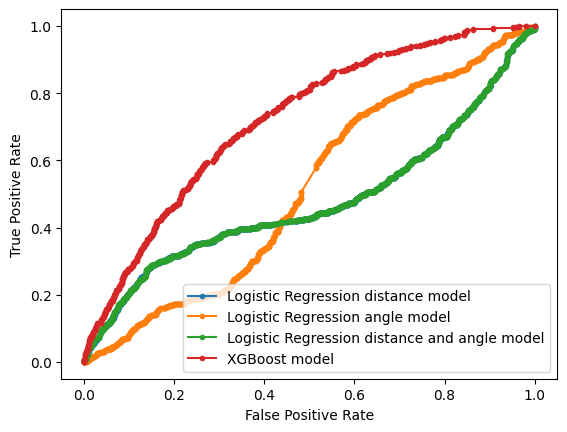

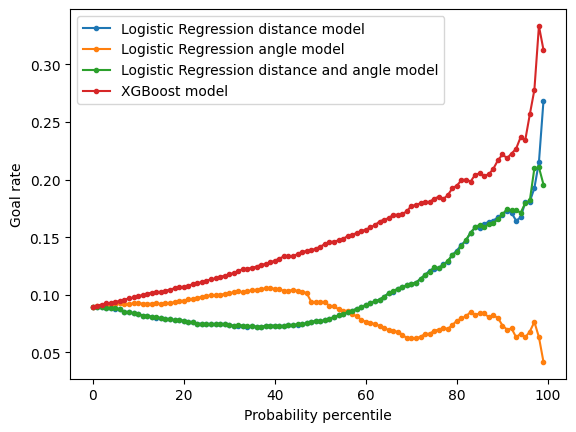

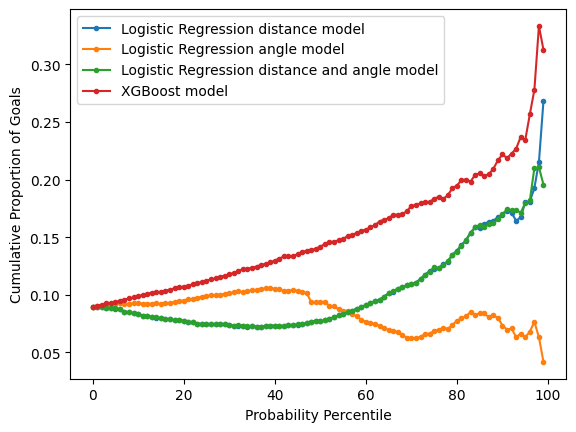

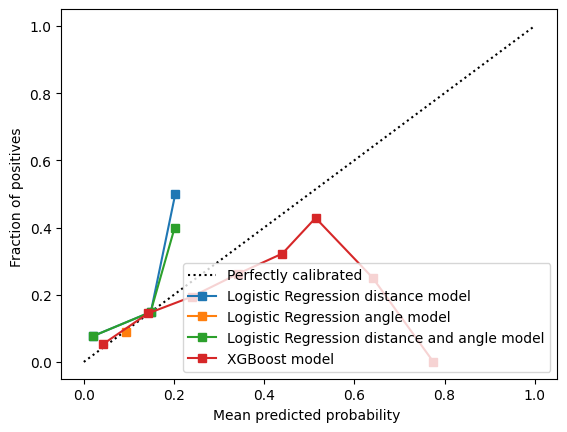

In [211]:
df_playoff_f1 = test_set_data("D:/NHLPro/data/test_data_playoff.csv")
df_playoff_f2 = test_set_data("D:/NHLPro/data/M2_added_features_all_test_playoff.csv")

# Download Logistic Regression distance model
#download_model("rachel98", "ift-6758-team-8", "BnMYvXDZv9WBMuRmR8Zm5v3W7", "logisticregression1",'1.0.1')

    # Load Logistic Regression distance model
lr_1_model = joblib.load("models/lr_dist.joblib")

X_playoff_f1 = df_playoff_f1[['shot_distance']]
y_playoff_f1 = df_playoff_f1['goal']

    # Predict on regular and playoff test set data from feature engineering 1
lr_1_playoff_f1 = lr_1_model.predict(X_playoff_f1)

    # Predict accuracy on regular and playoff test set data from feature engineering 1
    # Playoff
lr_1_playoff_f1_accuracy = accuracy_score(y_playoff_f1, lr_1_playoff_f1)
print("Logistic Regression distance model accuracy on playoff test set data from feature engineering 1: ", lr_1_playoff_f1_accuracy)

    # ROC Curve
    # calculate scores
lr_1_playoff_f1_probs = lr_1_model.predict_proba(X_playoff_f1)
    # keep probabilities for the positive outcome only
lr_1_playoff_f1_probs = lr_1_playoff_f1_probs[:, 1]
    # calculate roc curves
lr_1_playoff_f1_fpr, lr_1_playoff_f1_tpr, _ = roc_curve(y_playoff_f1, lr_1_playoff_f1_probs)
    # calculate AUC
lr_1_playoff_f1_auc = roc_auc_score(y_playoff_f1, lr_1_playoff_f1_probs)

    #Download Logistic Regression Model 2
    #download_model("rachel98", "ift-6758-team-8", "dhhXTe3W1hWhWsixMvPMFwDTb", "logisticregression2",'1.0.1')

    # Load Logistic Regression Model 2
lr_2_model = joblib.load("models/lr_angle.joblib")

    # Divide data into X and y
X_playoff_f1 = df_playoff_f1[['shot_angle']]
y_playoff_f1 = df_playoff_f1['goal']

    # Predict on regular and playoff test set data from feature engineering 1
lr_2_playoff_f1 = lr_2_model.predict(X_playoff_f1)

    # Predict accuracy on regular and playoff test set data from feature engineering 1
    # Playoff
lr_2_playoff_f1_accuracy = accuracy_score(y_playoff_f1, lr_2_playoff_f1)
print("Logistic Regression angle model accuracy on playoff test set data from feature engineering 1: ", lr_2_playoff_f1_accuracy)

    # calculate scores
lr_2_playoff_f1_probs = lr_2_model.predict_proba(X_playoff_f1)
    # keep probabilities for the positive outcome only
lr_2_playoff_f1_probs = lr_2_playoff_f1_probs[:, 1]
    # calculate roc curves
lr_2_playoff_f1_fpr, lr_2_playoff_f1_tpr, _ = roc_curve(y_playoff_f1, lr_2_playoff_f1_probs)
    # calculate AUC
lr_2_playoff_f1_auc = roc_auc_score(y_playoff_f1, lr_2_playoff_f1_probs)

    # Download Logistic Regression Model 3
    #download_model("rachel98", "ift-6758-team-8", "teU07th2Uy3oouUfkX6u3BUv2", "logisticregression3",'1.0.1')

    # Load Logistic Regression Model 3
lr_3_model = joblib.load("models/lr_dist_angle.joblib")

    # Divide data into X and y
X_playoff_f1 = df_playoff_f1[['shot_distance', 'shot_angle']]
y_playoff_f1 = df_playoff_f1['goal']

    # Predict on regular and playoff test set data from feature engineering 1
lr_3_playoff_f1 = lr_3_model.predict(X_playoff_f1)

    # Predict accuracy on regular and playoff test set data from feature engineering 1
    # Playoff
lr_3_playoff_f1_accuracy = accuracy_score(y_playoff_f1, lr_3_playoff_f1)
print("Logistic Regression distance and angle model accuracy on playoff test set data from feature engineering 1: ", lr_3_playoff_f1_accuracy)

    # ROC curve for regular data
    # calculate scores
lr_3_playoff_f1_probs = lr_3_model.predict_proba(X_playoff_f1)
    # keep probabilities for the positive outcome only
lr_3_playoff_f1_probs = lr_3_playoff_f1_probs[:, 1]
    # calculate roc curves
lr_3_playoff_f1_fpr, lr_3_playoff_f1_tpr, _ = roc_curve(y_playoff_f1, lr_3_playoff_f1_probs)
    # calculate AUC
lr_3_playoff_f1_auc = roc_auc_score(y_playoff_f1, lr_3_playoff_f1_probs)

    # Download XGBoost Final Model
    #download_model("rachel98", "ift-6758-team-8", "DPA8v9aBQumK4h2GAkMp6RA5d", "xgb3",'1.0.2')

    # Load XGBoost Final Model
xgb_model = joblib.load("models/xgb3.joblib")

    # Preprocess data
df_playoff_f2 = preprocess_data(df_playoff_f2)

    # Divide data into X and y
X_playoff_f2 = df_playoff_f2[['shot_angle','speed','shot_distance','distance_from_last_event','period_time','coordinates_y','time_from_last_event(s)']]
y_playoff_f2 = df_playoff_f2['goal']

    # Predict on regular and playoff test set data from feature engineering 2
xgb_playoff_f2 = xgb_model.predict(X_playoff_f2)

    # Predict accuracy on regular and playoff test set data from feature engineering 2
    # Playoff
xgb_playoff_f2_accuracy = accuracy_score(y_playoff_f2, xgb_playoff_f2)
print("XGBoost model accuracy on playoff test set data from feature engineering 2: ", xgb_playoff_f2_accuracy)

    # calculate scores
xgb_playoff_f2_probs = xgb_model.predict_proba(X_playoff_f2)
    # keep probabilities for the positive outcome only
xgb_playoff_f2_probs = xgb_playoff_f2_probs[:, 1]
    # calculate roc curves
xgb_playoff_f2_fpr, xgb_playoff_f2_tpr, _ = roc_curve(y_playoff_f2, xgb_playoff_f2_probs)
    # calculate AUC
xgb_playoff_f2_auc = roc_auc_score(y_playoff_f2, xgb_playoff_f2_probs)

    # Playoff curves
plot_roc_curve(lr_1_playoff_f1_fpr, lr_1_playoff_f1_tpr, lr_2_playoff_f1_fpr, lr_2_playoff_f1_tpr, lr_3_playoff_f1_fpr, lr_3_playoff_f1_tpr, xgb_playoff_f2_fpr, xgb_playoff_f2_tpr)
plot_goal_rate_vs_probability_percentile(y_playoff_f1,y_playoff_f2,lr_1_playoff_f1_probs, lr_2_playoff_f1_probs, lr_3_playoff_f1_probs, xgb_playoff_f2_probs)
plot_cumulative_proportion_of_goals_vs_probability_percentile(df_playoff_f1,df_playoff_f2,lr_1_playoff_f1_probs, lr_2_playoff_f1_probs, lr_3_playoff_f1_probs, xgb_playoff_f2_probs)
plot_calibration_curve(df_playoff_f1,df_playoff_f2,y_playoff_f1,y_playoff_f2,lr_1_playoff_f1_probs, lr_2_playoff_f1_probs, lr_3_playoff_f1_probs, xgb_playoff_f2_probs)